# Performance Review

该报告基于日收益数据给出详细的绩效评测。

In [3]:
import numpy as np
import pandas as pd
import pyodbc
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf

In [16]:
#Get return data

##Skydog DB
# end_date=dt.date.today()
# conn=pyodbc.connect('DRIVER={SQL Server};SERVER=port-mgr-sql.database.windows.net;DATABASE=port-mgr-sql;UID=port-mgr;PWD=Randomwalk2020')
# sqlstr='''select date,
#         units,
#         unit_price,
#         market_value_usd
#         from portfolio_performance_analyse where portfolio='Skydog'
#         order by date
#         '''
# df=pd.read_sql_query(sqlstr,conn)
# df['date']=pd.to_datetime(df.date)
# df=df[df['date']<=end_date]
# df=df.set_index(['date'])
# port_rets=df['unit_price']/df['unit_price'].shift(1)-1
# port_rets.name='Skydog High Grwoth Fund'


##Get return data for King's portfolio
# df=pd.read_excel("data/king_snapshot_daily.xlsx")
# df=df.set_index(['snapshot_date'])
# df=df['2020-1-1':]
# port_rets=np.log(df['unit_price']/df['unit_price'].shift(1))

##Get return data from backtest output
# port_rets=pd.read_csv('output/trend_QQQ_returns.csv')
# port_rets['date']=pd.to_datetime(port_rets['index'])
# port_rets=port_rets.set_index('date')
# port_rets=port_rets['return']

#Get return from yahoo finance
data=yf.download('MO',dt.date(2000,1,1),dt.date.today(),auto_adjust=True)
port_rets=data.Close.pct_change().dropna()
port_rets

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    0.019022
2000-01-04    0.008000
2000-01-05   -0.005291
2000-01-06   -0.018616
2000-01-07    0.027100
2000-01-10    0.013192
2000-01-11    0.005209
2000-01-12    0.005181
2000-01-13    0.010309
2000-01-14   -0.010204
2000-01-18   -0.051547
2000-01-19    0.016305
2000-01-20   -0.034091
2000-01-21   -0.025606
2000-01-24    0.000000
2000-01-25   -0.002840
2000-01-26   -0.039886
2000-01-27   -0.002968
2000-01-28   -0.011905
2000-01-31    0.006024
2000-02-01    0.005988
2000-02-02   -0.017857
2000-02-03    0.018181
2000-02-04   -0.017857
2000-02-07   -0.003031
2000-02-08   -0.051672
2000-02-09    0.006410
2000-02-10    0.012739
2000-02-11   -0.040880
2000-02-14   -0.006558
                ...   
2021-10-27   -0.012679
2021-10-28   -0.061474
2021-10-29   -0.010543
2021-11-01   -0.001360
2021-11-02    0.002270
2021-11-03    0.018346
2021-11-04   -0.007785
2021-11-05    0.013226
2021-11-08   -0.002876
2021-11-09   -0.006213
2021-11-10   -0.000893
2021-11-11    0.003352
2021-1

In [19]:
#准备benchmark数据
import yfinance as yf
import pyfolio as pf
import datetime

start_date=min(port_rets.index)
end_date=datetime.date.today()
qqq_price=yf.download('QQQ',start_date, end_date, auto_adjust=True)
qqq_rets=qqq_price.Close/qqq_price.Close.shift(1)-1
mchi_price=yf.download('KWEB',start_date, end_date, auto_adjust=True)
mchi_rets=mchi_price.Close/mchi_price.Close.shift(1)-1
benchmark_rets=qqq_rets
benchmark_rets.name='Benchmark'

benchmark_rets



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2000-01-03         NaN
2000-01-04   -0.068602
2000-01-05   -0.025496
2000-01-06   -0.068677
2000-01-07    0.123683
2000-01-10    0.027778
2000-01-11   -0.048649
2000-01-12   -0.022017
2000-01-13    0.060276
2000-01-14    0.023288
2000-01-18    0.005355
2000-01-19    0.022637
2000-01-20   -0.009766
2000-01-21    0.012492
2000-01-24   -0.048052
2000-01-25    0.015007
2000-01-26   -0.040323
2000-01-27    0.014707
2000-01-28   -0.050380
2000-01-31    0.042878
2000-02-01    0.026830
2000-02-02    0.008483
2000-02-03    0.039031
2000-02-04    0.006800
2000-02-07    0.013831
2000-02-08    0.041878
2000-02-09   -0.035323
2000-02-10    0.032829
2000-02-11   -0.023227
2000-02-14   -0.001251
                ...   
2021-10-27    0.002321
2021-10-28    0.011105
2021-10-29    0.004919
2021-11-01    0.003419
2021-11-02    0.004181
2021-11-03    0.010616
2021-11-04    0.012819
2021-11-05    0.000954
2021-11-08   -0.001355
2021-11-09   -0.006883
2021-11-10   -0.014697
2021-11-11    0.002773
2021-1

Start date,2000-01-03
End date,2021-12-08
Total months,262
,Backtest
Annual return,16.4%
Cumulative returns,2662.0%
Annual volatility,24.9%
Sharpe ratio,0.73
Calmar ratio,0.30
Stability,0.94
Max drawdown,-53.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,53.69,2017-06-19,2020-03-23,NaT,NaN
1,48.33,2002-06-04,2003-04-01,2003-12-11,398
2,38.44,2008-01-09,2008-11-20,2010-04-12,589
3,22.70,2000-01-13,2000-02-14,2000-05-08,83
4,22.18,2004-03-10,2004-05-24,2004-11-17,181


Stress Events,mean,min,max
Dotcom,0.42%,-5.84%,16.00%
Lehman,0.08%,-7.37%,3.58%
9/11,0.38%,-1.58%,4.57%
US downgrade/European Debt Crisis,0.24%,-5.21%,2.61%
Fukushima,0.39%,-1.70%,1.47%
US Housing,-0.39%,-3.52%,2.77%
EZB IR Event,-0.06%,-2.57%,1.53%
Aug07,0.20%,-2.77%,3.57%
Mar08,-0.03%,-2.50%,2.30%
Sept08,-0.00%,-7.37%,3.58%


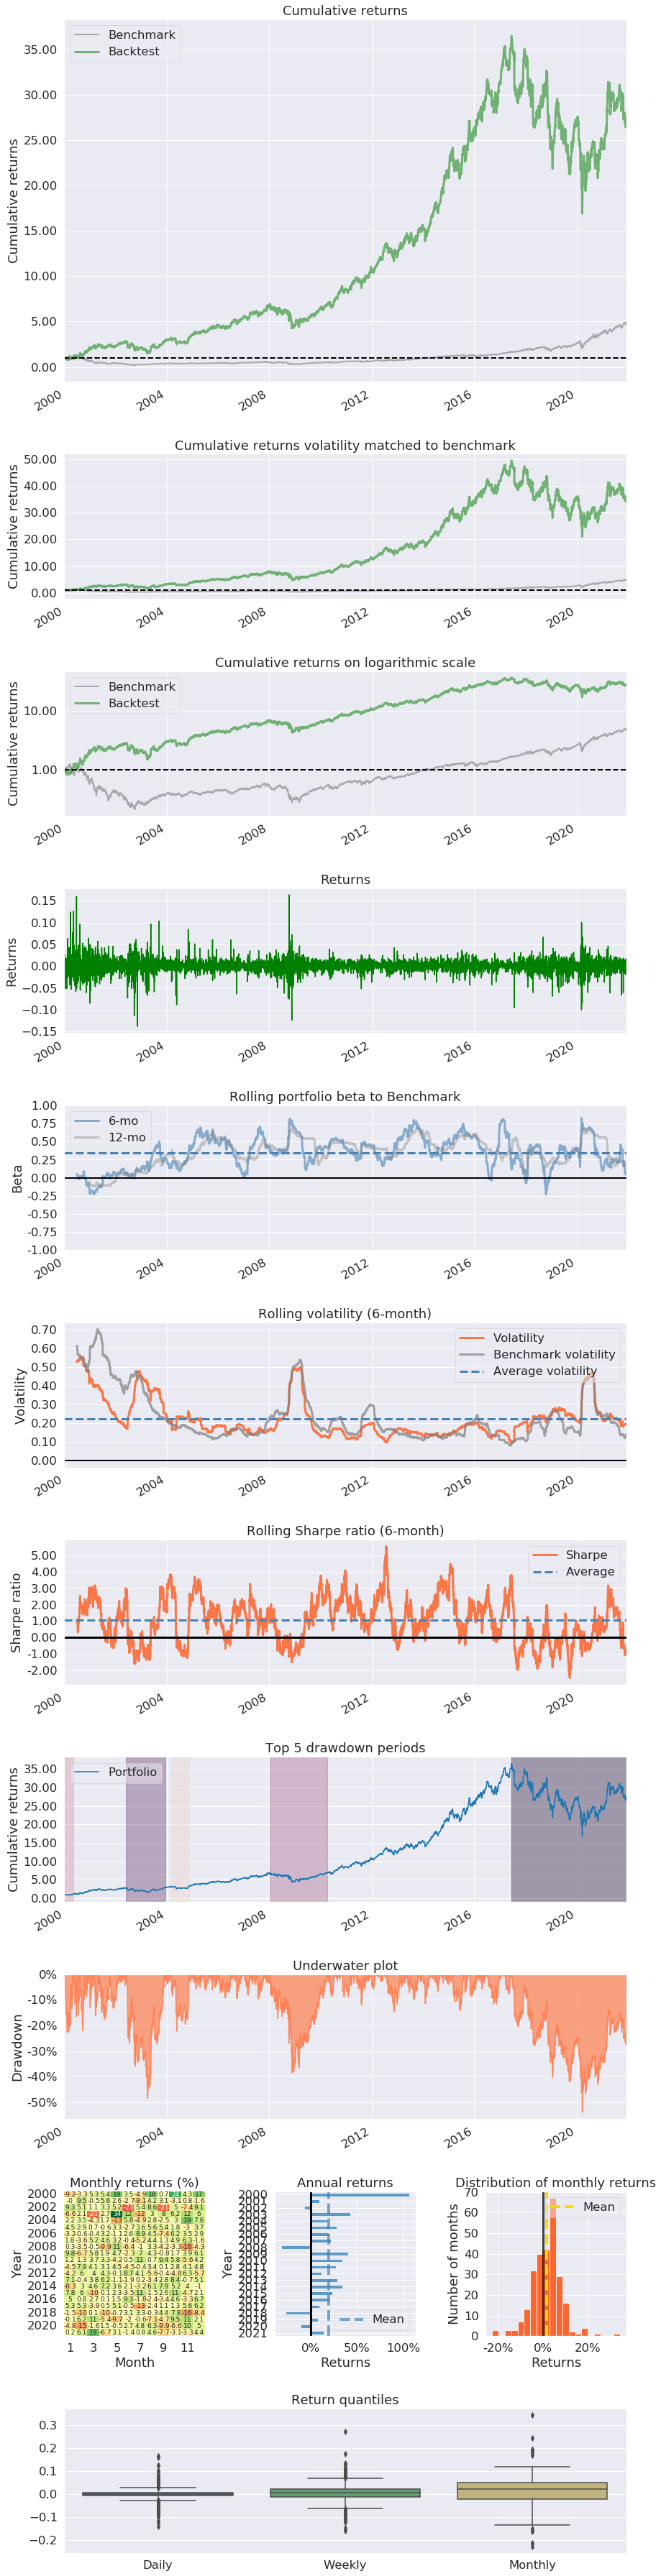

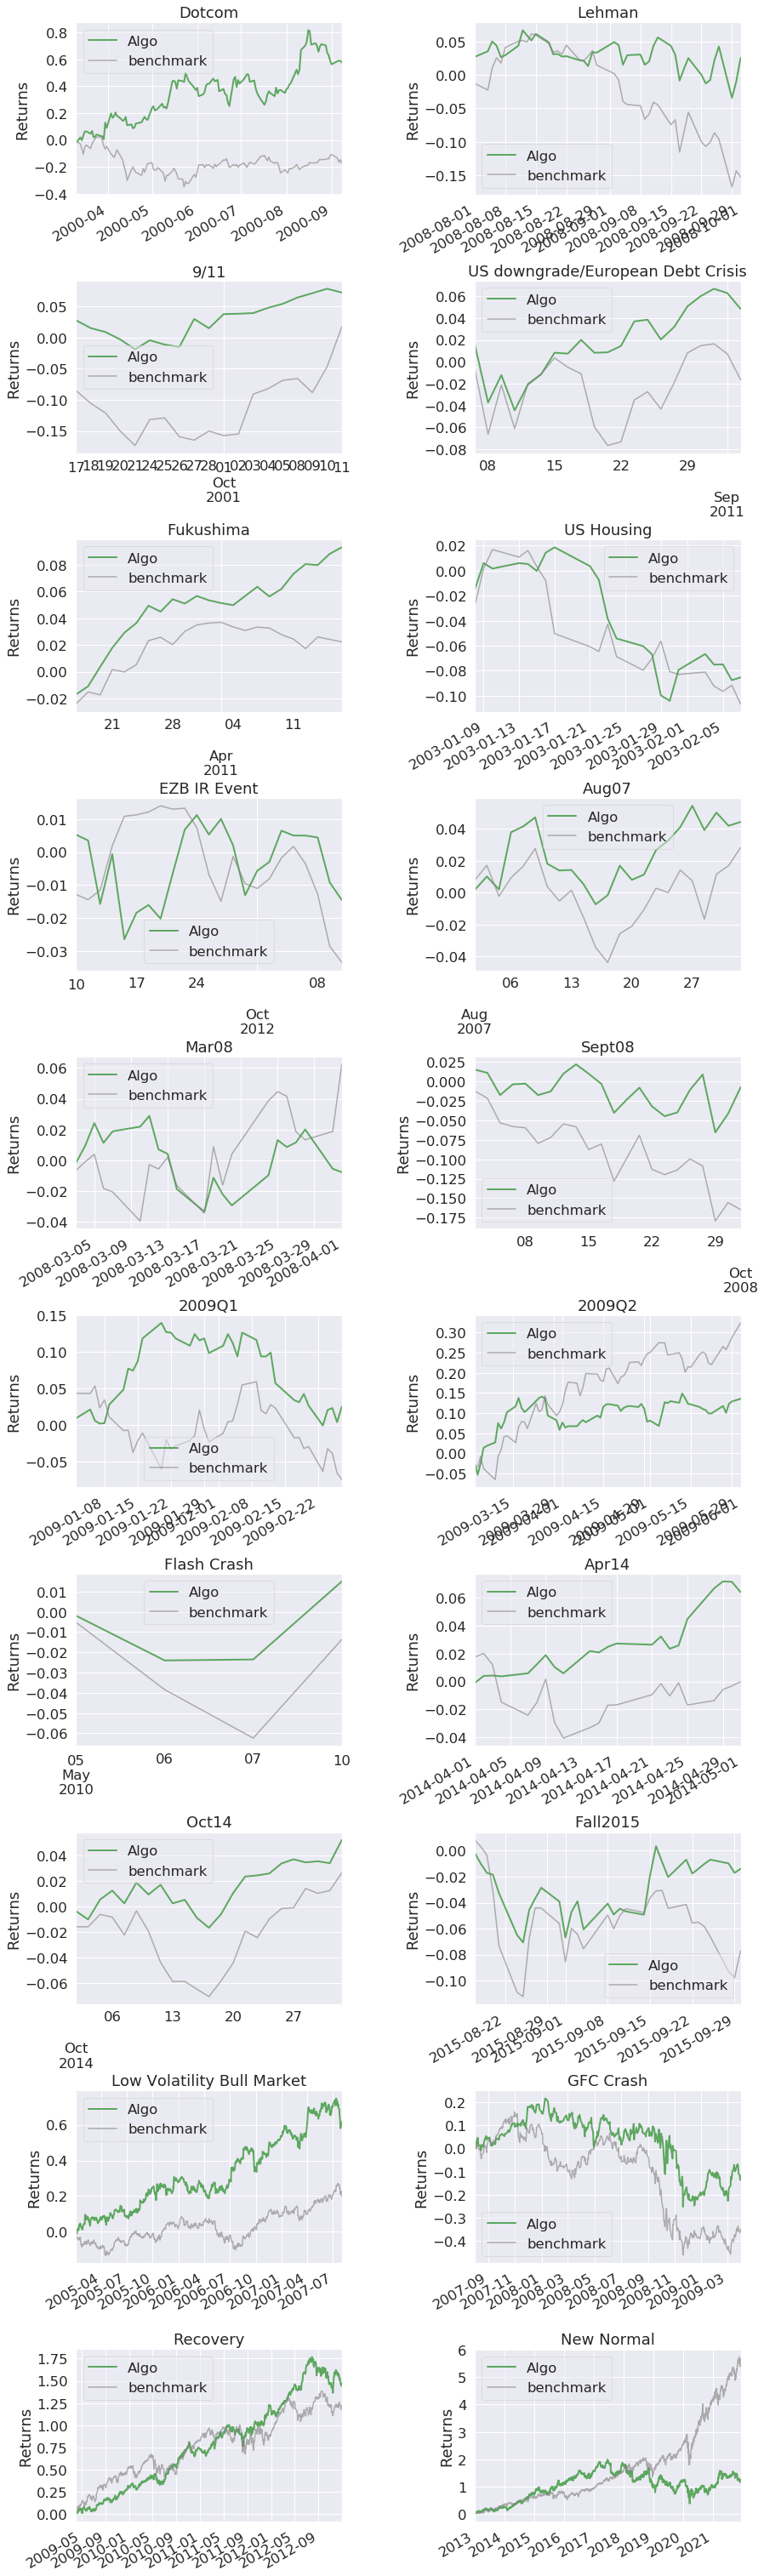

In [20]:
#输出分析报告
df_pystats = pf.timeseries.perf_stats(returns=port_rets)
pf.create_full_tear_sheet(
        returns=port_rets,
        benchmark_rets=benchmark_rets,
        
      
        )